In [21]:
!pip install paddlepaddle paddleocr

# TEST OCR Bounding Box Results and Database

In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

def save_ocr(img_path, out_path, result, font):
    if result:
        save_path = os.path.join(out_path, os.path.basename(img_path) + '_output.jpeg')
        image = cv2.imread(img_path)

        # Confirm if the image is loaded correctly
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        # Draw the boxes and text manually using OpenCV
        for line in result:
            box, (txt, conf) = line[0], line[1]
            
            # Ensure the box coordinates are in the correct shape
            box = np.array([np.array(coord) for coord in box]).astype(int)

            if box.shape[0] == 4:  # Ensure the box is quadrilateral
                cv2.polylines(image, [box], isClosed=True, color=(0, 255, 0), thickness=2)
                cv2.putText(image, txt, (box[0][0], box[0][1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Save the image with drawn OCR results
        cv2.imwrite(save_path, image)

        # Display the image with OCR results
        img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 10))
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()
    else:
        print('No OCR results found.')


In [23]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

out_path = '/kaggle/working/'
font = '/kaggle/input/deneme/simfang.ttf'

[2024/08/13 21:36:19] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25,

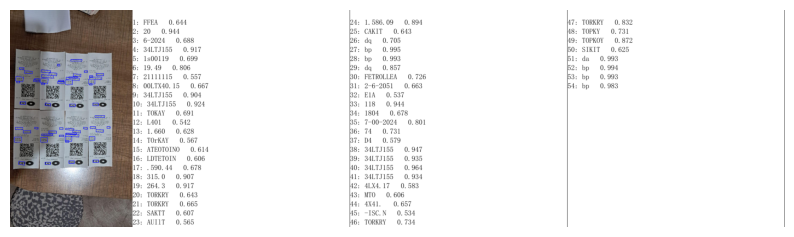

In [39]:
from paddleocr import PaddleOCR, draw_ocr
import cv2

# Initialize the OCR model
ocr = PaddleOCR(use_angle_cls=True, lang='tr')

# Load an image from the CORD dataset
img_path = '/kaggle/input/deneme/WhatsApp Image 2024-07-29 at 21.04.34.jpeg'
image = cv2.imread(img_path)

# Run OCR
result = ocr.ocr(img_path)
print(result)

# Extract the bounding boxes, text, and confidence scores
boxes = [line[0] for line in result[0]]
texts = [line[1][0] for line in result[0]]
scores = [line[1][1] for line in result[0]]

# Draw the results on the image
image_with_boxes = draw_ocr(image, boxes, texts, scores, font_path=font)

# Save the image with OCR results
output_image_path = os.path.join(out_path, 'ocr_result_with_boxes.jpg')
cv2.imwrite(output_image_path, image_with_boxes)

# Visualize the image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [27]:
import sqlite3

# Create a new SQLite database (or connect to an existing one)
database_name = '/kaggle/working/receipt_database_deneme.db'
conn = sqlite3.connect(database_name)

# Create a cursor object using the cursor() method
c = conn.cursor()

# Create a table (e.g., a table for storing OCR results)
c.execute('''
          CREATE TABLE IF NOT EXISTS OCRResults (
              id INTEGER PRIMARY KEY AUTOINCREMENT,
              text TEXT NOT NULL,
              confidence REAL NOT NULL
          )
          ''')

# Commit the transaction
conn.commit()

# Close the connection
conn.close()

print(f"Database '{database_name}' created successfully!")


Database '/kaggle/working/receipt_database.db' created successfully!


In [28]:
# Add data to the database
# Create a new SQLite database (or connect to an existing one)
database_name = '/kaggle/working/receipt_database.db'
conn = sqlite3.connect(database_name)
c = conn.cursor()

# Insert OCR results into the OCRResults table
for text, score in zip(texts, scores):
    c.execute("INSERT INTO OCRResults (text, confidence) VALUES (?, ?)", (text, score))

# Commit the transaction
conn.commit()

# Close the connection
conn.close()

print("OCR results inserted into the database successfully!")


OCR results inserted into the database successfully!


In [30]:
# Check the results

# Connect to the database
conn = sqlite3.connect('/kaggle/working/receipt_database_DENEME.db')
c = conn.cursor()

# Execute a query to retrieve all data from the OCRResults table
c.execute("SELECT * FROM OCRResults")

# Fetch all rows from the executed query
rows = c.fetchall()

# Display the rows
for row in rows:
    print(row)

# Close the connection
conn.close()


(1, 'OSR', 0.9191502928733826)
(2, 'TARIH18.07.2024', 0.9550068974494934)
(3, 'SAAT', 0.9957320094108582)
(4, '818:30', 0.8622000813484192)
(5, 'FISNO:0210', 0.9207817912101746)
(6, '8682974781172', 0.9957253932952881)
(7, 'Denden 16,5x23,5SftH', 0.911979079246521)
(8, '%10', 0.9823625087738037)
(9, '99,90', 0.954024612903595)
(10, '2789788632440', 0.9938384294509888)
(11, 'Nonwoven-Orta Boy Ca', 0.935102641582489)
(12, '%10', 0.9917068481445312)
(13, '4,90', 0.9627115726470947)
(14, 'TOPKDV', 0.9857407212257385)
(15, '9,53', 0.9552838802337646)
(16, 'TOPLAM', 0.9967573285102844)
(17, '104,80', 0.9522984027862549)
(18, 'KREDI KARTI', 0.9600909948348999)
(19, '*104,80', 0.8834983110427856)
(20, 'Yapikredi Tek Cekim', 0.9008736610412598)
(21, 'Provizyon No519532', 0.9753649830818176)
(22, 'KDV Orani', 0.8411072492599487)
(23, 'KDV Dahil Tutar', 0.9234631657600403)
(24, 'KDV', 0.9803438782691956)
(25, '%10', 0.9977152943611145)
(26, '104,80', 0.9524537920951843)
(27, '9.53', 0.84846472740

# FINAL CODE READ ALL RECEIPTS AND PRINT TOTAL AMOUNT

In [34]:
import os
import sqlite3
import cv2
from paddleocr import PaddleOCR

# Initialize the OCR model
ocr = PaddleOCR(use_angle_cls=True, lang='tr')

# Set the directory containing the images
img_directory = '/kaggle/input/deneme'

# Set up the database
database_name = '/kaggle/working/receipt_database.db'

try:
    # Connect to the database
    conn = sqlite3.connect(database_name)
    c = conn.cursor()

    # Drop the OCRResults table if it exists to avoid schema conflicts
    c.execute('DROP TABLE IF EXISTS OCRResults')

    # Create the OCRResults table with the correct schema
    c.execute('''
              CREATE TABLE OCRResults (
                  id INTEGER PRIMARY KEY AUTOINCREMENT,
                  image_name TEXT NOT NULL,
                  text TEXT NOT NULL,
                  confidence REAL NOT NULL
              )
              ''')

    # Iterate over all images in the directory
    for filename in os.listdir(img_directory):
        if filename.endswith(".jpeg") or filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(img_directory, filename)
            
            # Load and process the image
            image = cv2.imread(img_path)
            result = ocr.ocr(img_path)
            
            # Extract the text and confidence scores
            texts = [line[1][0] for line in result[0]]
            scores = [line[1][1] for line in result[0]]
            
            # Insert OCR results into the OCRResults table
            for text, score in zip(texts, scores):
                c.execute("INSERT INTO OCRResults (image_name, text, confidence) VALUES (?, ?, ?)", (filename, text, score))
    
    # Commit the transaction
    conn.commit()

except sqlite3.OperationalError as e:
    print(f"An error occurred: {e}")
finally:
    # Ensure the connection is closed
    conn.close()

print("OCR results inserted into the database successfully!")


[2024/08/13 21:29:05] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25,

In [40]:
# Reconnect to the database
conn = sqlite3.connect(database_name)
c = conn.cursor()

# Query to 'TOPLAM' rows and the row immediately following 'TOPLAM'
c.execute("""
          SELECT id, image_name, text, confidence 
          FROM OCRResults 
          WHERE text LIKE '%TOPLAM%' 
          OR id IN (SELECT id + 1 FROM OCRResults WHERE text LIKE '%TOPLAM%')
          """)

# Fetch and print the rows
rows = c.fetchall()
for row in rows:
    print(row)

# Close the connection
conn.close()


(33, 'WhatsApp Image 2024-07-29 at 21.04.35.jpeg', 'TOPLAM', 0.9970703721046448)
(34, 'WhatsApp Image 2024-07-29 at 21.04.35.jpeg', '*1.716.22', 0.9016410112380981)
(35, 'WhatsApp Image 2024-07-29 at 21.04.35.jpeg', 'TOPLAM', 0.9960103034973145)
(36, 'WhatsApp Image 2024-07-29 at 21.04.35.jpeg', '379,16', 0.9372023940086365)
(40, 'WhatsApp Image 2024-07-29 at 21.04.35.jpeg', 'TOPLAM', 0.9942979216575623)
(41, 'WhatsApp Image 2024-07-29 at 21.04.35.jpeg', '364,16', 0.9311547875404358)
(102, 'WhatsApp Image 2024-07-29 at 21.04.35.jpeg', 'TOPLAM', 0.9968982338905334)
(103, 'WhatsApp Image 2024-07-29 at 21.04.35.jpeg', '1.920.00', 0.9070239067077637)
(104, 'WhatsApp Image 2024-07-29 at 21.04.35.jpeg', 'TOPLAM', 0.9972896575927734)
(105, 'WhatsApp Image 2024-07-29 at 21.04.35.jpeg', '2.750.00', 0.9074653387069702)
(106, 'WhatsApp Image 2024-07-29 at 21.04.35.jpeg', 'TOPLAM', 0.9968931674957275)
(107, 'WhatsApp Image 2024-07-29 at 21.04.35.jpeg', '2.072.70', 0.908674955368042)
(330, 'WhatsAp